In [36]:
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# load the image and resize it to a smalle rfactor so that the shapes can be approximated better
def detectShapes(originalImage):
    copyImage = originalImage.copy()
    mat = np.ones((5, 5), np.uint8)
    gradImage = cv2.morphologyEx(copyImage, cv2.MORPH_GRADIENT, mat)

    resized = imutils.resize(gradImage, width=1000)
    ratio = copyImage.shape[0] / float(resized.shape[0])

    # convert the resized newImage to grayscale, blur it slightly and threshold it
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 25, 255, cv2.THRESH_BINARY)

    # find contours in the threshold copyImage and initialize the shape detector
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    shapeDetectorObject = ShapeDetector()

    Triangle = 0
    Rectangle = 0
    Square = 0
    Circle = 0
    Star = 0

    # loop over the contours
    for current in contours:
        # compute the center of the contour, then detect the name of the
        # shape using only the contour
        M = cv2.moments(current)
        cX = int((M["m10"] / M["m00"]) * ratio)
        cY = int((M["m01"] / M["m00"]) * ratio)

        # Check which shape came back and add to amount variable
        shape = shapeDetectorObject.detect(current)

        if (shape == "triangle"):
            Triangle += 1
        elif (shape == "rectangle"):
            Rectangle += 1
        elif (shape == "square"):
            Square += 1
        elif (shape == "star"):
            Star += 1
        elif (shape == "circle"):
            Circle += 1

        # multiply the contour (x, y)-coordinates by the resize ratio,
        # then draw the contours and the name of the shape on the copyImage
        current = current.astype("float")
        current *= ratio
        current = current.astype("int")
        cv2.drawContours(copyImage, [current], -1, (0, 255, 0), 3)
        cv2.putText(copyImage, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # No need for post process: Example why:
    # laplacian = cv2.Laplacian(newImage, cv2.CV_16S, ksize=3)
    # newImage = newImage + laplacian


    return gradImage, thresh, copyImage, Triangle, Rectangle, Square, Star, Circle

In [47]:
import cv2

class ShapeDetector:
    def __init__(self):
        pass

    def detect(self,c):
        shape = "unidentified"
        peri = cv2.arcLength(c,True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)

        # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "triangle"

        # if the shape has 4 vertices, it is either a square or a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the bounding box to compute the aspect ratio
            x,y,w,h = cv2.boundingRect(approx)
            ar = w / float(h)

            # a square will have an aspect ratio that is approximately equal to one, otherwise, the shape is rectangle
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"


        # if the shape is a star, it will have 10 vertices
        elif len(approx) == 10:
            shape = "star"

        # otherwise we will assume that the shape is circle
        else:
            area = cv2.contourArea(c)
            if(len(approx) >= 6) & (len(approx) <= 23) and area > 30:
                shape = "unidentified"

        #return the name of the shape
        return shape

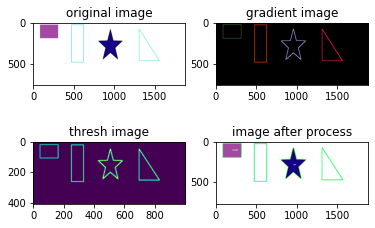

Triangles: 1
Rectangles: 2
Stars: 1


In [51]:
originalImage = cv2.imread("photos/two rectangles one star one triangle.png")

gradImage, thresh, copyImage, \
Triangle, Rectangle, Square, Star, Circle = detectShapes(originalImage)

# show the output newImage
plt.figure()

plt.subplot(221)
plt.imshow(originalImage)
plt.title("original image")

plt.subplot(222)
plt.imshow(gradImage)
plt.title("gradient image")

plt.subplot(223)
plt.imshow(thresh)
plt.title("thresh image")

plt.subplot(224)
plt.imshow(copyImage)
plt.title("image after process")

plt.show()

if (Triangle > 0):
    print("Triangles:", Triangle)
if (Rectangle > 0):
    print("Rectangles:", Rectangle)
if (Square > 0):
    print("Squares:", Square)
if (Star > 0):
    print("Stars:", Star)
if (Circle > 0):
    print("Circles:", Circle)